In [4]:
import pandas as pd 
import numpy as np
#word manipulation
from nltk.tokenize import word_tokenize  

df_books = pd.read_csv('master_context.csv', '\t',encoding='utf-8')

In [5]:
df_books.head()

,Unnamed: 0,context,tags,book_id,section_id
0,0,\r\n\r\nIt is a truth universally acknowledged...,100\1.txt,100,1
1,1,\r\n\r\nThe next day opened a new scene at Lon...,100\10.txt,100,10
2,2,\r\n\r\nThe discussion of Mr. Collins's offer ...,100\11.txt,100,11
3,3,\r\n\r\nElizabeth was sitting with her mother ...,100\12.txt,100,12
4,4,\r\n\r\nAfter a week spent in professions of l...,100\13.txt,100,13


In [6]:
df_books['context_len'] = df_books['context'].str.split().apply(len)

In [7]:
df_books.head()

,Unnamed: 0,context,tags,book_id,section_id,context_len
0,0,\r\n\r\nIt is a truth universally acknowledged...,100\1.txt,100,1,1643
1,1,\r\n\r\nThe next day opened a new scene at Lon...,100\10.txt,100,10,3552
2,2,\r\n\r\nThe discussion of Mr. Collins's offer ...,100\11.txt,100,11,3710
3,3,\r\n\r\nElizabeth was sitting with her mother ...,100\12.txt,100,12,3536
4,4,\r\n\r\nAfter a week spent in professions of l...,100\13.txt,100,13,3834


In [8]:
np.average(df_books['context'].str.split().apply(len))

6213.5436201780412

In [9]:
table = pd.pivot_table(df_books,columns ='book_id', values = 'context_len', aggfunc=np.mean)
#table2 =  table.div()                   
print (table)

book_id              12      35       77           79           83   \
context_len  1633.666667  6196.3  2198.25  3692.533333  5256.444444   

book_id              84      85           86      87           88   \
context_len  4858.916667  3399.8  2980.555556  5701.6  1214.102041   

book_id          ...          165     166          167          168     171  \
context_len      ...       8417.2  4151.5  6940.615385  7629.566667  8044.1   

book_id          172           173          174     175           178  
context_len  15199.4  25881.888889  4454.655172  8078.7  10043.566667  

[1 rows x 90 columns]


In [10]:
table = table.transpose()

Text(0.5,1,'Average Context Length by Book')

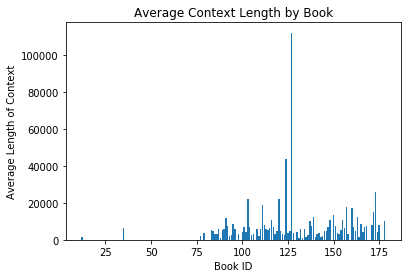

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

table = pd.DataFrame(table)
plt.bar(table.index,  table['context_len'])
plt.xlabel('Book ID')
plt.ylabel("Average Length of Context")
plt.title("Average Context Length by Book")

In [12]:
df_books[df_books['context_len']>40000]

,Unnamed: 0,context,tags,book_id,section_id,context_len
207,207,CHAPTER XVI\r\n\r\n�She has come to stay with ...,111\30.txt,111,30,47828
420,420,���Chapter 49. Hayd��e\r\n\r\nIt will be recol...,120\10.txt,120,10,45267
436,436,���VOLUME TWO\r\n\r\n20009m\r\n\r\n\r\n20011m\...,120\7.txt,120,7,56455
498,498,���PART II\r\n\r\n\r\n\r\n\r\nBook IV. Lacerat...,124\3.txt,124,3,76972
499,499,���PART III\r\n\r\n\r\n\r\n\r\nBook VII. Alyos...,124\4.txt,124,4,53647
500,500,���Book IX. The Preliminary Investigation\r\n\...,124\5.txt,124,5,51328
501,501,���Book XI. Ivan\r\n\r\n\r\n\r\nChapter I. At ...,124\6.txt,124,6,43413
547,547,���VOLUME I.--FANTINE.\r\n\r\n\r\n\r\nPREFACE\...,127\1.txt,127,1,120469
548,548,���VOLUME II.--COSETTE\r\n\r\n\r\n\r\nBOOK FIR...,127\2.txt,127,2,103733
549,549,���VOLUME III--MARIUS.\r\n\r\nEnlarge\r\n\r\n\...,127\3.txt,127,3,92053


In [13]:
df_books_clipped = df_books[df_books['context_len']<75000]

In [14]:
np.average(df_books_clipped['context'].str.split().apply(len))

5855.8493150684935

In [15]:
df_merge2["question"] = df_merge2["question"].str.replace("[^\w\. \r \n @-]",'')
df_merge2['question'] = df_merge2['question'].astype('str')
df_merge2['tokens'] = df_merge2['question'].apply(word_tokenize)
df_merge2['tokens'] = df_merge2['tokens'].astype('str')
df_merge2['tokens2'] = df_merge2['tokens'].str.replace('\d+', '')
df_merge2['tokens2'] = df_merge2['tokens2'].str.lower()

NameError: name 'df_merge2' is not defined

In [55]:
context_length_dist = df_books_clipped['context'].str.split().apply(len).value_counts()
context_length_dist

5892     4
1147     3
2225     3
1841     3
1177     3
4120     3
4462     2
1313     2
8054     2
840      2
2563     2
2408     2
1797     2
1157     2
5766     2
7249     2
5202     2
3637     2
2180     2
2743     2
777      2
3046     2
5896     2
4303     2
3119     2
5423     2
3117     2
2597     2
3116     2
3393     2
        ..
19824    1
3442     1
7540     1
10828    1
7132     1
7311     1
1374     1
5468     1
3520     1
9563     1
998      1
2166     1
9526     1
916      1
7058     1
5436     1
5595     1
9677     1
3397     1
5446     1
8340     1
1353     1
3466     1
9550     1
5455     1
3544     1
7508     1
9488     1
7513     1
3691     1
Name: context, Length: 1553, dtype: int64

In [56]:
context_length_dist = pd.DataFrame(context_length_dist)

In [57]:
context_length_dist.index

Int64Index([5892, 1147, 2225, 1841, 1177, 4120, 4462, 1313, 8054,  840,
            ...
            8340, 1353, 3466, 9550, 5455, 3544, 7508, 9488, 7513, 3691],
           dtype='int64', length=1553)

In [58]:
context_length_dist.head()

,context
5892,4
1147,3
2225,3
1841,3
1177,3


In [59]:
context_length_dist['context']

5892     4
1147     3
2225     3
1841     3
1177     3
4120     3
4462     2
1313     2
8054     2
840      2
2563     2
2408     2
1797     2
1157     2
5766     2
7249     2
5202     2
3637     2
2180     2
2743     2
777      2
3046     2
5896     2
4303     2
3119     2
5423     2
3117     2
2597     2
3116     2
3393     2
        ..
19824    1
3442     1
7540     1
10828    1
7132     1
7311     1
1374     1
5468     1
3520     1
9563     1
998      1
2166     1
9526     1
916      1
7058     1
5436     1
5595     1
9677     1
3397     1
5446     1
8340     1
1353     1
3466     1
9550     1
5455     1
3544     1
7508     1
9488     1
7513     1
3691     1
Name: context, Length: 1553, dtype: int64

Text(0.5,1,'Distribution of Context Length')

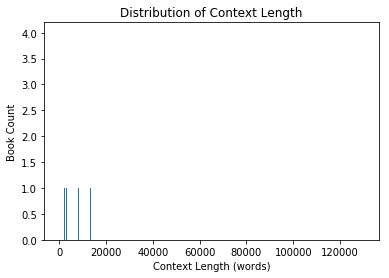

In [46]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(context_length_dist.index, list(context_length_dist['context'])[:])
plt.xlabel('Context Length (words)')
plt.ylabel("Book Count")
plt.title("Distribution of Context Length")

Text(0.5,1,'Distribution of Context Length')

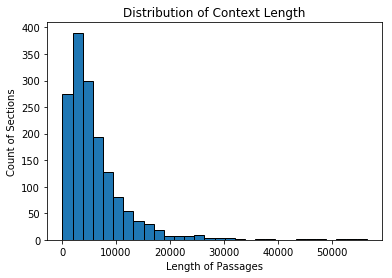

In [68]:
#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

n_bins = 30
# We can set the number of bins with the `bins` kwarg
plt.hist(context_length_dist.index, bins=n_bins, edgecolor = 'black')
plt.xlabel('Length of Passages')
plt.ylabel("Count of Sections")
plt.title("Distribution of Context Length")
#axs[1].hist(list(context_length_dist['context'])[:], bins=n_bins)